In [83]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################



directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


In [84]:
leg1Definition={}
leg1Definition["type"]="Fixed"
leg1Definition["payOrReceive"]="Receive"
leg1Definition["currency"]="USD"
leg1Definition["notional"]=1000000
leg1Definition["coupon"]=0.00971619
leg1Definition["spread"]= 0.0
leg1Definition["frequency"]="Semiannual"
leg1Definition["dayCounter"]="Thirty360"
leg1Definition["calendar"]="UnitedStates"
leg1Definition["maturityDateConvention"]="ModifiedFollowing"
leg1Definition["businessDayConvention"]="ModifiedFollowing"
leg1Definition["dateGeneration"]="Backward"
leg1Definition["endOfMonth"]=True
leg1Definition["initialNominal"]=1000000
leg1Definition["resetTable"]=False
leg1Definition["runningCapitalExchange"]=False
leg1Definition["fixingDate"]=[]
leg1Definition["fixingRate"]=[]
leg1Definition

{'type': 'Fixed',
 'payOrReceive': 'Receive',
 'currency': 'USD',
 'notional': 1000000,
 'coupon': 0.00971619,
 'spread': 0.0,
 'frequency': 'Semiannual',
 'dayCounter': 'Thirty360',
 'calendar': 'UnitedStates',
 'maturityDateConvention': 'ModifiedFollowing',
 'businessDayConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'initialNominal': 1000000,
 'resetTable': False,
 'runningCapitalExchange': False,
 'fixingDate': [],
 'fixingRate': []}

In [85]:
leg2Definition={}
leg2Definition["type"]="Floating"
leg2Definition["payOrReceive"]="Pay"
leg2Definition["currency"]="EUR"
leg2Definition["notional"]=838447.865
leg2Definition["coupon"]=0.0
leg2Definition["spread"]= 0.0
leg2Definition["frequency"]="Quarterly"
leg2Definition["dayCounter"]="Actual360"
leg2Definition["calendar"]="TARGET"
leg2Definition["maturityDateConvention"]="ModifiedFollowing"
leg2Definition["businessDayConvention"]="ModifiedFollowing"
leg2Definition["dateGeneration"]="Backward"
leg2Definition["endOfMonth"]=True
leg2Definition["initialNominal"]=838447.865
leg2Definition["resetTable"]=False
leg2Definition["runningCapitalExchange"]=False
leg2Definition["fixingDate"]=["2021-03-12"]
leg2Definition["fixingRate"]=[-0.00477]
leg2Definition

{'type': 'Floating',
 'payOrReceive': 'Pay',
 'currency': 'EUR',
 'notional': 838447.865,
 'coupon': 0.0,
 'spread': 0.0,
 'frequency': 'Quarterly',
 'dayCounter': 'Actual360',
 'calendar': 'TARGET',
 'maturityDateConvention': 'ModifiedFollowing',
 'businessDayConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'initialNominal': 838447.865,
 'resetTable': False,
 'runningCapitalExchange': False,
 'fixingDate': ['2021-03-12'],
 'fixingRate': [-0.00477]}

In [86]:
instruments={}
depo={}

depo["businessDayConvention"]="ModifiedFollowing"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                        # if it is null, default value is used

instruments["DEPO"]=depo

instruments

{'DEPO': {'businessDayConvention': 'ModifiedFollowing',
  'dayCounter': 'Actual360'}}

In [87]:
leg1yieldcurveconfig={
      "name": "USDZCS",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments
    }
leg1yieldcurveconfig

{'name': 'USDZCS',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'ModifiedFollowing',
   'dayCounter': 'Actual360'}}}

In [88]:
 leg2yieldcurveconfig= {
      "name": "EURZCS",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "UnitedStates",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments":instruments
    }

In [89]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "VaR",
  "forRisk": False,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "USD",
  "riskMethod": "HISTORICAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [
    {
      "trade_id": "CCSWAP1000",
      "calculation_type": "cc_swap",
      "settlementDate": "2021-03-12",
      "maturityDate": "2026-03-12",
      "startDate": "2021-03-12",
      "spotPrice": 1.2121,
      "leg1": leg1Definition,
      "leg2": leg2Definition,
      "leg1DiscountCurve": "USDZCS",
      "leg2DiscountCurve": "EURZCS",
      "leg2ForecastCurve": "USDZCS",

    },
  ],
  "curves": [leg1yieldcurveconfig,leg2yieldcurveconfig],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [90]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [91]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['VAR', result.get('VaR')])
npvTable.add_row(['VAR/PV (%)', result.get('var/pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+------------+
| Parameters |      Value |
+------------+------------+
|         PV |  9000.4502 |
|        VAR | 14515.6580 |
| VAR/PV (%) |   161.2770 |
+------------+------------+


In [92]:
portfoliohistorical=result.get("CCSWAP1000")

In [93]:
portfoliohistoricaldates=[]
portfoliohistoricalvalues=[]
for date,value in portfoliohistorical.items():
    portfoliohistoricaldates.append(date)
    portfoliohistoricalvalues.append(value)

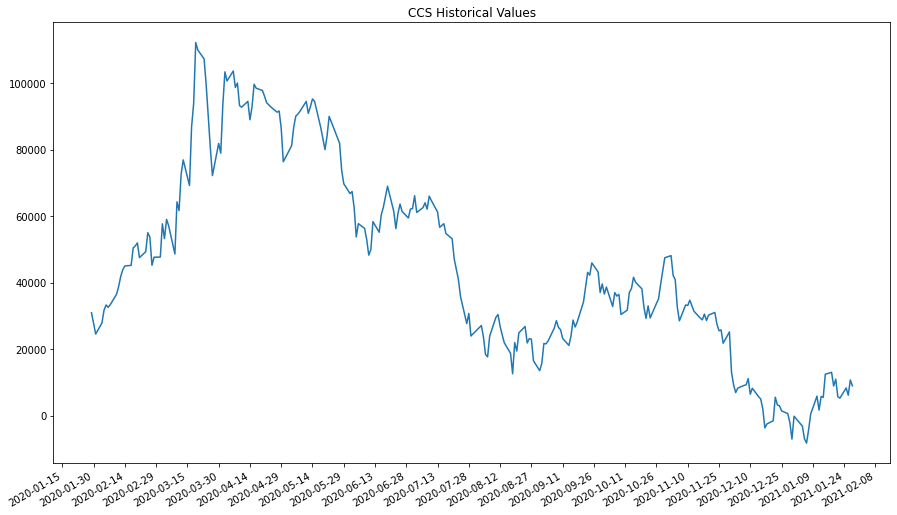

In [94]:
converted_dates = list(map(datetime.datetime.strptime, portfoliohistoricaldates, len(portfoliohistoricaldates)*['%Y-%m-%d']))
plt.figure(figsize=(15,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.plot(converted_dates, portfoliohistoricalvalues)
plt.title("CCS Historical Values")
plt.show()

In [95]:
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################

In [96]:
riskdata["method"]="risk_factors"

In [97]:
try:
    res = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(res["result"]):
        rfresult=json.loads(res["result"])
    else:
        print(res["result"])
except RhoovaError as e:
    e.printPretty()

In [98]:
rfresult_df=pd.DataFrame(rfresult)

In [99]:
lastdf=rfresult_df.filter(regex='USDZCS')
lastdf1=rfresult_df.filter(regex='EURZCS')

In [100]:
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################


In [101]:
ccsdata = {
        "valuationDate": "2021-01-28",
        "settlementDate": "2021-03-12",
        "maturityDate": "2026-03-12",
        "startDate": "2021-03-12",
        "spotPrice": 1.2121,
        "leg1": leg1Definition,
        "leg2": leg2Definition,
        "leg1DiscountCurve": leg1yieldcurveconfig,
        "leg2DiscountCurve": leg2yieldcurveconfig,
         "yieldData": yielddata.to_dict('r')
       }
try:
    data = api.createTask(CalculationType.CROSS_CURRENCY, ccsdata, True)
    result=json.loads(data["result"])
except RhoovaError as e:
    e.printPretty()

In [102]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['Fixed Leg PV', result.get('leg1Pv')])
npvTable.add_row(['Float Leg PV', result.get('leg2Pv')])
npvTable.add_row(['Leg1 BPS', result.get('leg1Bps')])
npvTable.add_row(['Leg2 BPS', result.get('leg2Bps')])
npvTable.add_row(['Base Currency', result.get('baseCurrency')])
npvTable.add_row(['Base Currency PV', result.get('baseCurrencyResult')])
npvTable.add_row(['Quoted Currency', result.get('quotedCurrency')])
npvTable.add_row(['Quoted Currency PV', result.get('quotedCurrencyResult')])
npvTable.add_row(['Spot Rate', result.get('spotRate')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)

+--------------------+--------------+
|         Parameters |        Value |
+--------------------+--------------+
|       Fixed Leg PV | 1025135.4045 |
|       Float Leg PV | -838326.0080 |
|           Leg1 BPS |     494.0106 |
|           Leg2 BPS |    -420.4330 |
|      Base Currency |          EUR |
|   Base Currency PV |    7425.5020 |
|    Quoted Currency |          USD |
| Quoted Currency PV |    9000.4502 |
|          Spot Rate |       1.2121 |
+--------------------+--------------+


In [103]:
historicalvalues=[]
historicaldates=[]
for index, row in lastdf.iterrows():
    
    mdata=marketdata[marketdata["isinCode"]=="EUR"]
    mdata1=mdata[mdata["currency"]=="USD"]
    mdata2=mdata1[mdata1["valuationDate"]==index]
    spot=list(mdata2["value"].values)[0]
    #print(spot)
    y_data=yielddata[yielddata['valuationDate']==index]
    y_data['valuationDate']='2021-01-28'
    ccsdata['yieldData']=json.loads(y_data.to_json(orient='records'))
    ccsdata['spotPrice']= spot
    try:
        resultdata = api.createTask(CalculationType.CROSS_CURRENCY, ccsdata,True)
        resulttmp=json.loads(resultdata["result"])
    except RhoovaError as e:
        e.printPretty()
    historicaldates.append(index)    
    historicalvalues.append(resulttmp.get('quotedCurrencyResult'))
    #print(index)
    #print(resulttmp.get('quotedCurrencyResult'))

In [104]:
confidenceInterval= 0.99
valueatrisk=result.get('quotedCurrencyResult')-np.percentile(historicalvalues[:-1],100*(1-confidenceInterval))

In [105]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('quotedCurrencyResult')])
npvTable.add_row(['VAR', valueatrisk])
npvTable.add_row(['VAR/PV (%)', 100*valueatrisk/abs(result.get('quotedCurrencyResult'))])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+------------+
| Parameters |      Value |
+------------+------------+
|         PV |  9000.4502 |
|        VAR | 14541.8384 |
| VAR/PV (%) |   161.5679 |
+------------+------------+


In [31]:
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################
###################################################################################################


In [32]:
datelist=['2021-02-01','2021-02-02','2021-02-08','2021-02-15','2021-02-22','2021-03-01','2021-04-01','2021-05-03',
          '2021-08-02','2021-11-01','2022-02-01','2023-02-01','2024-02-01','2025-02-03','2026-02-02','2027-02-01',
          '2028-02-01','2029-02-01','2030-02-01','2031-02-03','2033-02-01','2036-02-01','2041-02-01','2046-02-01',
          '2051-02-01','2061-02-01','2071-02-02']

In [33]:
rf=dict(zip(lastdf.columns, datelist))
rf

{'USDZCS0D': '2021-02-01',
 'USDZCS1D': '2021-02-02',
 'USDZCS1W': '2021-02-08',
 'USDZCS2W': '2021-02-15',
 'USDZCS3W': '2021-02-22',
 'USDZCS1M': '2021-03-01',
 'USDZCS2M': '2021-04-01',
 'USDZCS3M': '2021-05-03',
 'USDZCS6M': '2021-08-02',
 'USDZCS9M': '2021-11-01',
 'USDZCS1Y': '2022-02-01',
 'USDZCS2Y': '2023-02-01',
 'USDZCS3Y': '2024-02-01',
 'USDZCS4Y': '2025-02-03',
 'USDZCS5Y': '2026-02-02',
 'USDZCS6Y': '2027-02-01',
 'USDZCS7Y': '2028-02-01',
 'USDZCS8Y': '2029-02-01',
 'USDZCS9Y': '2030-02-01',
 'USDZCS10Y': '2031-02-03',
 'USDZCS12Y': '2033-02-01',
 'USDZCS15Y': '2036-02-01',
 'USDZCS20Y': '2041-02-01',
 'USDZCS25Y': '2046-02-01',
 'USDZCS30Y': '2051-02-01',
 'USDZCS40Y': '2061-02-01',
 'USDZCS50Y': '2071-02-02'}

In [34]:
yielddata_lst=[]
for index, row in lastdf.iterrows():
    for key,val in row.items():
        yielddata_dict={}
        yielddata_dict["valuationDate"]=index
        yielddata_dict["maturityDate"]=rf[key]
        yielddata_dict["value"]=val
        yielddata_dict["instrument"]="USDZeroRates"
        yielddata_dict["currency"]="USD"
        yielddata_dict["settlementDate"]=""
        yielddata_dict["period"]="6M"
        yielddata_dict["tenor"]=""
        yielddata_lst.append(yielddata_dict)

In [35]:
# Fix parameters for building yield curve
yieldcurveconfig2={
        "name": "USDZCS",
        "settlementDays": 2,
        "intpMethod": "LINEAR",
        "currency": "USD",
        "calendar": "Turkey",
        "dayCounter": "Actual360",
        "zeroRates": "USDZeroRates",
        "period":"6M"
    }

In [36]:
ccsdata = {
        "valuationDate": "2021-01-28",
        "settlementDate": "2021-03-12",
        "maturityDate": "2026-03-12",
        "startDate": "2021-03-12",
        "spotPrice": 1.2121,
        "leg1": leg1Definition,
        "leg2": leg2Definition,
        "leg1DiscountCurve": yieldcurveconfig2,
        "leg2DiscountCurve": yieldcurveconfig2,
         "yieldData": yielddata_lst
       }
try:
    data = api.createTask(CalculationType.CROSS_CURRENCY, ccsdata, True)
    result=json.loads(data["result"])
except RhoovaError as e:
    e.printPretty()

In [37]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['Fixed Leg PV', result.get('leg1Pv')])
npvTable.add_row(['Float Leg PV', result.get('leg2Pv')])
npvTable.add_row(['Leg1 BPS', result.get('leg1Bps')])
npvTable.add_row(['Leg2 BPS', result.get('leg2Bps')])
npvTable.add_row(['Base Currency', result.get('baseCurrency')])
npvTable.add_row(['Base Currency PV', result.get('baseCurrencyResult')])
npvTable.add_row(['Quoted Currency', result.get('quotedCurrency')])
npvTable.add_row(['Quoted Currency PV', result.get('quotedCurrencyResult')])
npvTable.add_row(['Spot Rate', result.get('spotRate')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)

+--------------------+--------------+
|         Parameters |        Value |
+--------------------+--------------+
|       Fixed Leg PV | 1025135.2765 |
|       Float Leg PV | -838319.7801 |
|           Leg1 BPS |     494.0129 |
|           Leg2 BPS |    -420.4348 |
|      Base Currency |          EUR |
|   Base Currency PV |    7431.6199 |
|    Quoted Currency |          USD |
| Quoted Currency PV |    9007.8710 |
|          Spot Rate |       1.2121 |
+--------------------+--------------+


In [38]:
historicalvalues2=[]
historicaldates2=[]
yielddata_lst_df=pd.DataFrame(yielddata_lst)
for index, row in lastdf.iterrows():
    
    mdata=marketdata[marketdata["isinCode"]=="EUR"]
    mdata1=mdata[mdata["currency"]=="USD"]
    mdata2=mdata1[mdata1["valuationDate"]==index]
    spot=list(mdata2["value"].values)[0]
    
    y_data=yielddata_lst_df[yielddata_lst_df['valuationDate']==index]
    y_data['valuationDate']='2021-01-28'
    ccsdata['yieldData']=json.loads(y_data.to_json(orient='records'))
    ccsdata['spotPrice']= spot
    try:
        resultdata = api.createTask(CalculationType.CROSS_CURRENCY, ccsdata,True)
        resulttmp=json.loads(resultdata["result"])
    except RhoovaError as e:
        e.printPretty()
    historicaldates2.append(index)    
    historicalvalues2.append(resulttmp.get('quotedCurrencyResult'))
    #print(index,resulttmp.get('quotedCurrencyResult'))    


In [39]:
confidenceInterval= 0.99
valueatrisk=result.get('quotedCurrencyResult')-np.percentile(historicalvalues[:-1],100*(1-confidenceInterval))

In [40]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('quotedCurrencyResult')])
npvTable.add_row(['VAR', valueatrisk])
npvTable.add_row(['VAR/PV (%)', 100*valueatrisk/abs(result.get('quotedCurrencyResult'))])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+------------+
| Parameters |      Value |
+------------+------------+
|         PV |  9007.8710 |
|        VAR | 14549.2591 |
| VAR/PV (%) |   161.5172 |
+------------+------------+


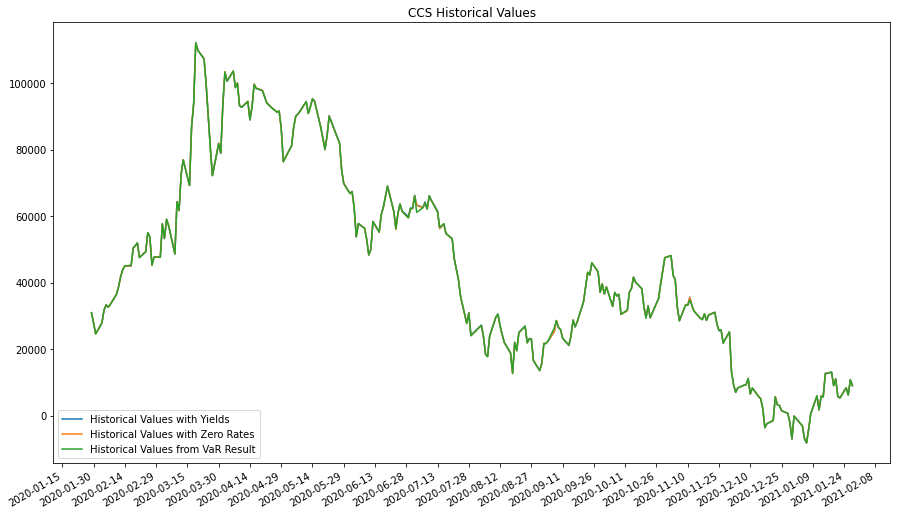

In [106]:
converted_dates = list(map(datetime.datetime.strptime, historicaldates, len(historicaldates)*['%Y-%m-%d']))
plt.figure(figsize=(15,9))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gcf().autofmt_xdate()
plt.plot(converted_dates[:-1], historicalvalues[:-1], label="historicalvalues")
plt.plot(converted_dates[:-1], historicalvalues2[:-1], label="historicalvalues2")
plt.plot(converted_dates[:-1], portfoliohistoricalvalues, label="portfoliohistoricalvalues")
plt.legend(["Historical Values with Yields", "Historical Values with Zero Rates","Historical Values from VaR Result"], loc ="lower left")
plt.title("CCS Historical Values")
plt.show()